Import libraries

In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Reading the csv file

In [5]:
crime = pd.read_csv("crime_data_india.csv")
crime.head()

,Unnamed: 0,Murder,Assault,Shoplifting,robbery
0,Andhra Pradesh,13.2,236.0,108.0,88.0
1,Arunachal Pradesh,10.0,186.0,68.0,44.5
2,Assam,8.8,190.0,50.0,19.5
3,Bihar,15.1,282.0,88.0,189.0
4,Chhattisgarh,7.9,204.0,78.0,38.7


Rename the "Unnamed" column as "State"

In [6]:
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [7]:
crime.head()

,state,Murder,Assault,Shoplifting,robbery
0,Andhra Pradesh,13.2,236.0,108.0,88.0
1,Arunachal Pradesh,10.0,186.0,68.0,44.5
2,Assam,8.8,190.0,50.0,19.5
3,Bihar,15.1,282.0,88.0,189.0
4,Chhattisgarh,7.9,204.0,78.0,38.7


Checking the shape of the data

In [8]:
crime.shape

(36, 5)

Checking for null values and the data type

In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        36 non-null     object 
 1   Murder       36 non-null     float64
 2   Assault      36 non-null     float64
 3   Shoplifting  36 non-null     float64
 4   robbery      36 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


Checking for duplicate values

In [10]:
crime[crime.duplicated(keep= False)]

,state,Murder,Assault,Shoplifting,robbery


Checking the statistics of the crime dataset

In [11]:
crime.describe()

,Murder,Assault,Shoplifting,robbery
count,36.000000,36.000000,36.000000,36.000000
mean,7.991667,179.325000,71.863889,68.827778
std,3.421226,82.134247,12.922166,42.220142
min,1.900000,64.000000,44.000000,16.300000
25%,5.225000,107.050000,63.300000,27.775000
50%,8.050000,167.000000,72.500000,71.500000
75%,10.500000,260.750000,80.250000,93.725000
max,15.100000,311.000000,108.000000,189.000000


Checking for the outliers with boxplot

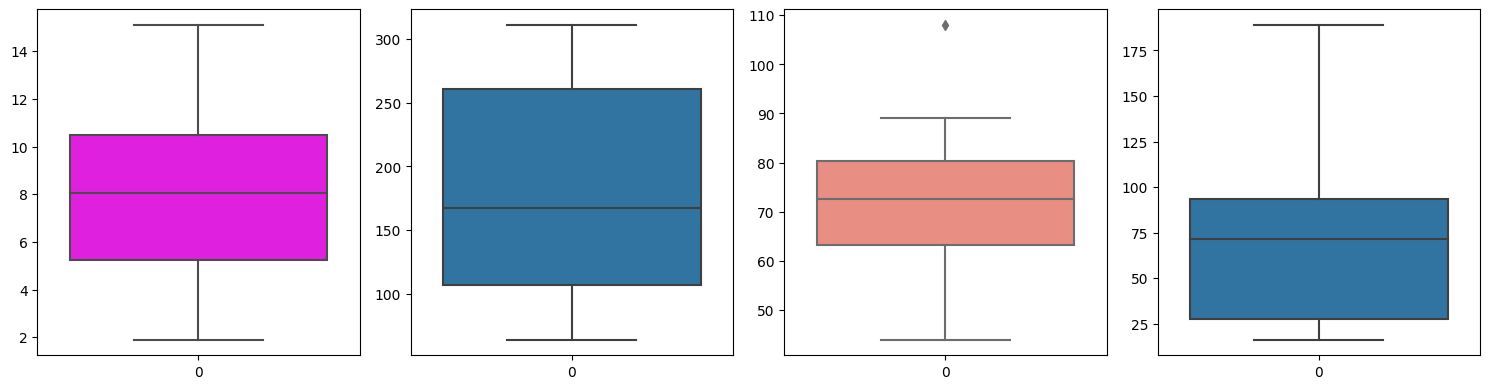

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
sns.boxplot(crime.Murder, ax=ax[0],color='magenta')
sns.boxplot(crime.Assault, ax=ax[1])
sns.boxplot(crime.Shoplifting, ax=ax[2],color='salmon')
sns.boxplot(crime.robbery, ax=ax[3])
plt.tight_layout()
plt.show()

Cheking for the normal distribution in the data using distplot

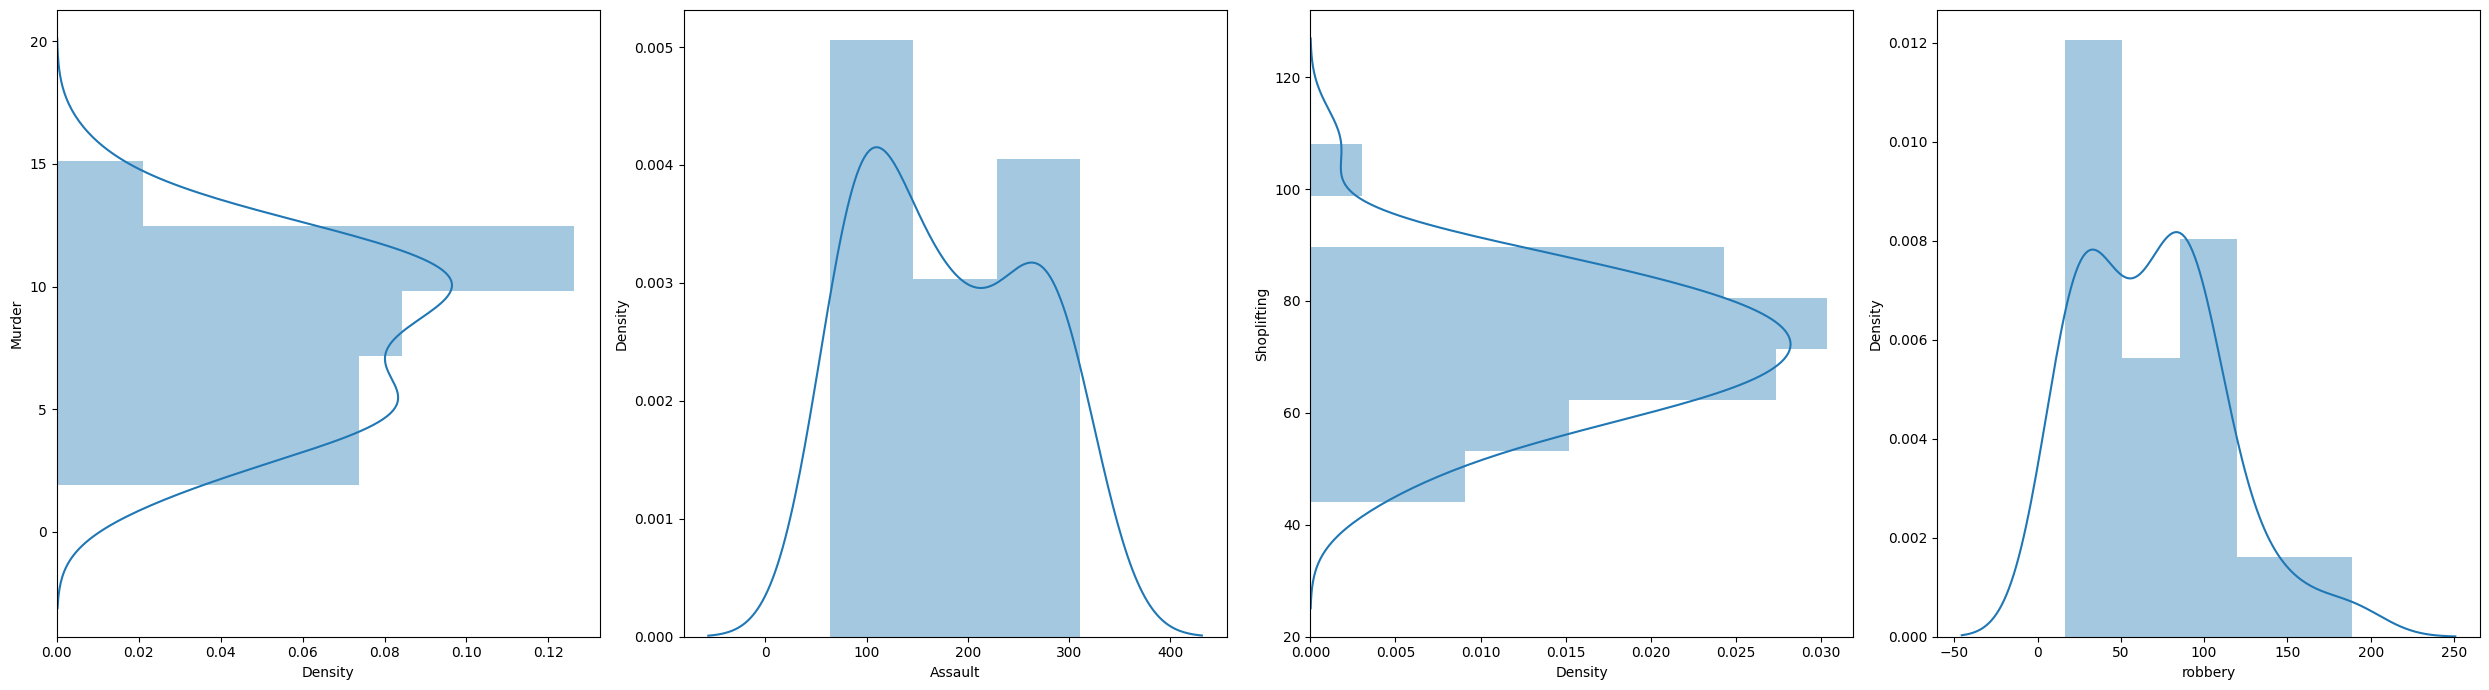

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(25,7))
sns.distplot(crime.Murder, ax=ax[0], vertical=True)
sns.distplot(crime.Assault, ax=ax[1])
sns.distplot(crime.Shoplifting, ax=ax[2],vertical=True)
sns.distplot(crime.robbery, ax=ax[3])
plt.tight_layout()
plt.show()

Applying normalization on data because different features have different range

In [14]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
df_norm = norm_func(crime.iloc[:,1:])

Normalized crime data

In [16]:
df_norm.head()

,Murder,Assault,Shoplifting,robbery
0,0.856061,0.696356,1.00000,0.415171
1,0.613636,0.493927,0.37500,0.163289
2,0.522727,0.510121,0.09375,0.018529
3,1.000000,0.882591,0.68750,1.000000
4,0.454545,0.566802,0.53125,0.129705


Hierarchical clustering on crime data using single linkage

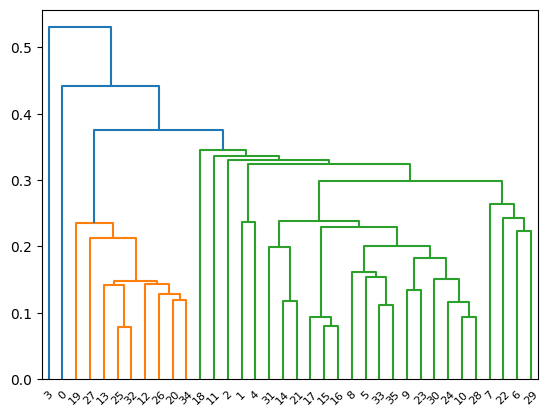

In [17]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

Hierarchial Clustering with just 2 clusters

In [18]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [19]:
y_hc1 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [20]:
crime['cluster'] = y_hc1

In [21]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,Shoplifting,robbery
,,mean,mean,mean,mean
0,0,7.788571,176.391429,71.402857,65.394286
1,1,15.100000,282.000000,88.000000,189.000000


Viewing the data in each cluster

In [22]:
for i in range(2):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Andhra Pradesh | Arunachal Pradesh | Assam | Chhattisgarh | Goa | Gujarat | Haryana | Himachal Pradesh | Jharkhand | Karnataka | Kerala | Madhya Pradesh | Maharashtra | Manipur | Meghalaya | Mizoram | Nagaland | Odisha | Punjab | Rajasthan | Sikkim | Tamil Nadu | Telangana | Tripura | Uttar Pradesh | Uttarakhand | West Bengal | Andaman and Nicobar Islands | Chandigarh | Dadra and Nagar Haveli and Daman and Diu | Lakshadweep | Delhi | Puducherry | Jammu and Kashmir | Ladakh
Total Members: 35

cluster 1
The Members: Bihar
Total Members: 1



From the above result, it is evident that, this method is not giving proper result. So, we will try a different method for identify best number of clusters

In [23]:
crime = pd.read_csv("crime_data_india.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [24]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

Hierarchial clustering with average linkage

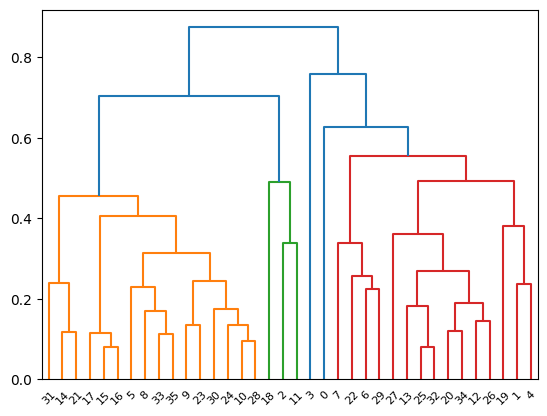

In [25]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [26]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [27]:
y_hc2 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

Creating a new cluster column with the average linkage cluster labels

In [28]:
crime['cluster'] = y_hc2

In [29]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,Shoplifting,robbery
,,mean,mean,mean,mean
0,0,10.450000,246.90000,78.043750,91.831250
1,1,9.866667,186.00000,48.666667,20.966667
2,2,15.100000,282.00000,88.000000,189.000000
3,3,4.737500,104.08125,69.025000,47.287500


Viewing the values in each cluster

In [30]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Andhra Pradesh | Arunachal Pradesh | Chhattisgarh | Gujarat | Haryana | Madhya Pradesh | Maharashtra | Punjab | Rajasthan | Tamil Nadu | Uttar Pradesh | Uttarakhand | West Bengal | Chandigarh | Delhi | Jammu and Kashmir
Total Members: 16

cluster 1
The Members: Assam | Kerala | Odisha
Total Members: 3

cluster 2
The Members: Bihar
Total Members: 1

cluster 3
The Members: Goa | Himachal Pradesh | Jharkhand | Karnataka | Manipur | Meghalaya | Mizoram | Nagaland | Sikkim | Telangana | Tripura | Andaman and Nicobar Islands | Dadra and Nagar Haveli and Daman and Diu | Lakshadweep | Puducherry | Ladakh
Total Members: 16



Hirerachial clustering - complete linkage method

In [31]:
crime = pd.read_csv("crime_data_india.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [32]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

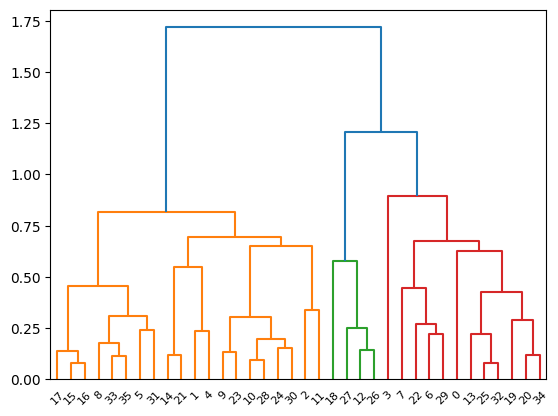

In [33]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [34]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [35]:
y_hc3 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [36]:
crime['cluster'] = y_hc3

In [37]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,Shoplifting,robbery
,,mean,mean,mean,mean
0,0,5.610000,117.715000,67.620000,43.780000
1,1,10.745455,247.127273,82.790909,100.381818
2,2,10.550000,275.250000,59.000000,77.250000
3,3,15.100000,282.000000,88.000000,189.000000


Viewing the values in all the 4 clusters, built using complete linkage method

In [38]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Arunachal Pradesh | Assam | Chhattisgarh | Goa | Himachal Pradesh | Jharkhand | Karnataka | Kerala | Manipur | Meghalaya | Mizoram | Nagaland | Sikkim | Telangana | Tripura | Andaman and Nicobar Islands | Dadra and Nagar Haveli and Daman and Diu | Lakshadweep | Puducherry | Ladakh
Total Members: 20

cluster 1
The Members: Andhra Pradesh | Gujarat | Haryana | Maharashtra | Punjab | Rajasthan | Tamil Nadu | Uttar Pradesh | Chandigarh | Delhi | Jammu and Kashmir
Total Members: 11

cluster 2
The Members: Madhya Pradesh | Odisha | Uttarakhand | West Bengal
Total Members: 4

cluster 3
The Members: Bihar
Total Members: 1



Ward(centroid) linkage method

In [39]:
crime = pd.read_csv("crime_data_india.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [40]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

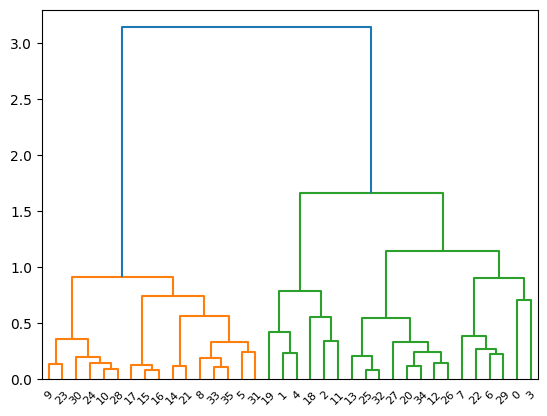

In [41]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [42]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [43]:
y_hc4 = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

In [44]:
crime['cluster'] = y_hc4

In [45]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,Shoplifting,robbery
,,mean,mean,mean,mean
0,0,4.737500,104.081250,69.025000,47.287500
1,1,10.683333,212.566667,87.083333,130.450000
2,2,9.950000,200.000000,62.166667,32.016667
3,3,11.012500,289.375000,73.400000,93.300000


Viewing the values in all the 4 clusters, built using centroid linkage method

In [46]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Goa | Himachal Pradesh | Jharkhand | Karnataka | Manipur | Meghalaya | Mizoram | Nagaland | Sikkim | Telangana | Tripura | Andaman and Nicobar Islands | Dadra and Nagar Haveli and Daman and Diu | Lakshadweep | Puducherry | Ladakh
Total Members: 16

cluster 1
The Members: Andhra Pradesh | Bihar | Gujarat | Haryana | Tamil Nadu | Chandigarh
Total Members: 6

cluster 2
The Members: Arunachal Pradesh | Assam | Chhattisgarh | Kerala | Odisha | Punjab
Total Members: 6

cluster 3
The Members: Madhya Pradesh | Maharashtra | Rajasthan | Uttar Pradesh | Uttarakhand | West Bengal | Delhi | Jammu and Kashmir
Total Members: 8



K means clustering

In [47]:
crime = pd.read_csv("crime_data_india.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

User defined function to normalize the values

In [48]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])

Plotting elbow curve to determine the best number of clusters to be used in KMeans

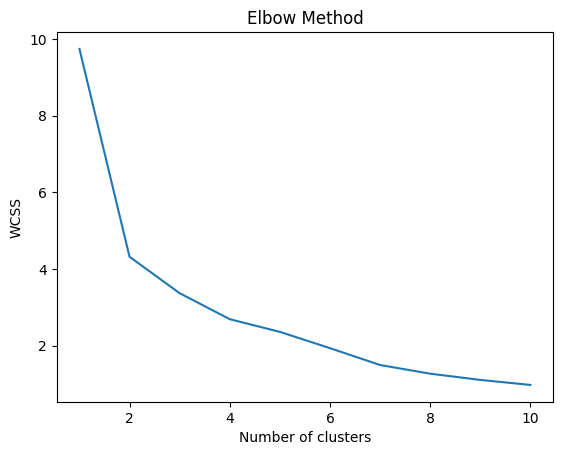

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Creating a Kmeans cluster with 4 groups

In [50]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [51]:
KM_label=clusters_new.labels_

In [52]:
crime['cluster'] = clusters_new.labels_

In [53]:
clusters_new.cluster_centers_

array([[0.7003367 , 0.89563653, 0.47256944, 0.41542817],
       [0.21496212, 0.16227227, 0.39101562, 0.17942965],
       [0.66540404, 0.60148448, 0.67317708, 0.66097279],
       [0.57575758, 0.50850202, 0.225     , 0.07481181]])

In [54]:
crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,Shoplifting,robbery
,,mean,mean,mean,mean
0,0,11.144444,285.222222,74.244444,88.044444
1,1,4.737500,104.081250,69.025000,47.287500
2,2,10.683333,212.566667,87.083333,130.450000
3,3,9.500000,189.600000,58.400000,29.220000


Viewing the values in each of the Kmeans cluster

In [55]:
for i in range(4):
    print("cluster", i)
    print("The Members:", ' | '.join(list(crime[crime['cluster'] == i]['state'].values)))
    print("Total Members:", len(list(crime[crime['cluster'] == i]['state'].values)))
    print()

cluster 0
The Members: Madhya Pradesh | Maharashtra | Punjab | Rajasthan | Uttar Pradesh | Uttarakhand | West Bengal | Delhi | Jammu and Kashmir
Total Members: 9

cluster 1
The Members: Goa | Himachal Pradesh | Jharkhand | Karnataka | Manipur | Meghalaya | Mizoram | Nagaland | Sikkim | Telangana | Tripura | Andaman and Nicobar Islands | Dadra and Nagar Haveli and Daman and Diu | Lakshadweep | Puducherry | Ladakh
Total Members: 16

cluster 2
The Members: Andhra Pradesh | Bihar | Gujarat | Haryana | Tamil Nadu | Chandigarh
Total Members: 6

cluster 3
The Members: Arunachal Pradesh | Assam | Chhattisgarh | Kerala | Odisha
Total Members: 5



Applying DBSCAN clustering technique

In [56]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(df_norm)

DBSCAN(eps=0.3, min_samples=3)

In [57]:
dbscan.labels_

array([-1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0,  0,  0,
        0, -1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,
        1,  0])

In [58]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])
cl.head()

,cluster_db
0,-1
1,-1
2,-1
3,-1
4,-1


In [59]:
crime['clust_db_scan']=cl.cluster_db

Importing the metrics for calculating silhouette score

In [60]:
s1=(metrics.silhouette_score(df_norm,y_hc1))
s1

0.3178051558311987

In [61]:
s2=(metrics.silhouette_score(df_norm,y_hc2))
s2

0.34750315392670117

In [62]:
s3=(metrics.silhouette_score(df_norm,y_hc3))
s3

0.29984399123658334

In [63]:
s4=(metrics.silhouette_score(df_norm,y_hc4))
s4

0.36664230467011

In [64]:
s5=(metrics.silhouette_score(df_norm,clusters_new.labels_))
s5

0.3705255317299804

In [65]:
s6=(metrics.silhouette_score(df_norm,cl.cluster_db))
s6

0.30171844488319444

Consolidating

In [66]:
t={'Model':['Single','Average','Complete','Ward','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
t=pd.DataFrame(t)
t

,Model,Sillhouette score
0,Single,0.317805
1,Average,0.347503
2,Complete,0.299844
3,Ward,0.366642
4,Kmeans,0.370526
5,DBScan,0.301718


Visualization

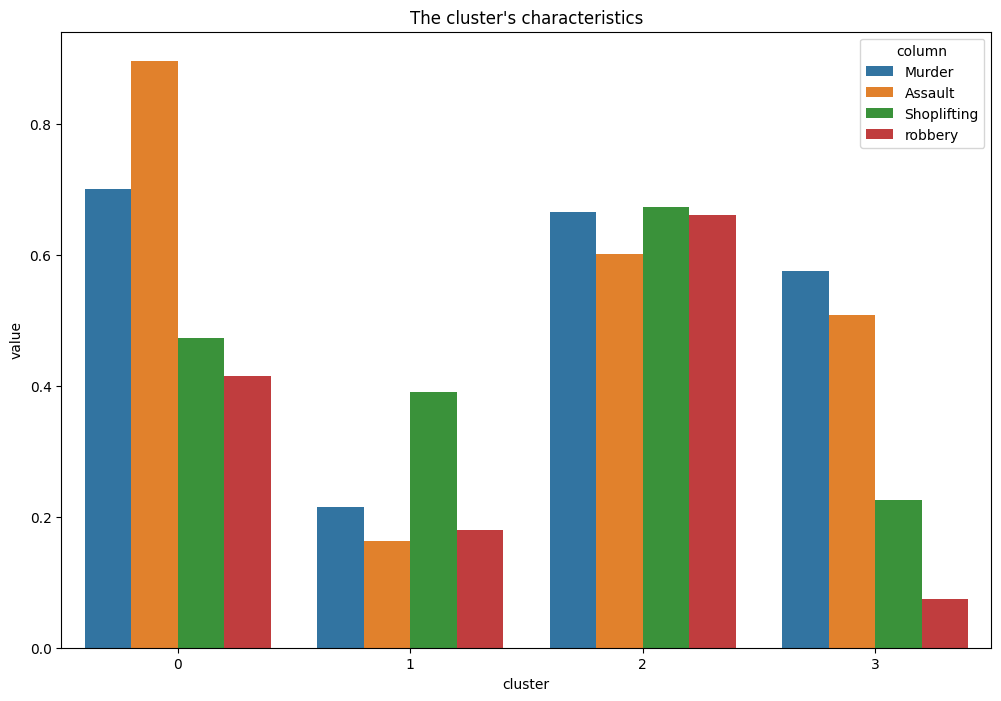

In [67]:
visualize = pd.DataFrame(clusters_new.cluster_centers_)
visualize = visualize.T
visualize['column'] = ['Murder','Assault','Shoplifting','robbery']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()